## Now for the 3rd and last part of the EDA, to explore low tension tariff - domestic to understand the household electricity sector
- will look at mainly the quarterly tariff (since tariff is set by EMA & SP on a quarterly basis), LNG and crude oil prices.
    - Singapore's fuel mix for electricity generation is >90% Natural Gas, of which it is a ~50-50 split between Liquefied NG & Pipeline NG
    - LNG has its own indices whereas PNG is closely related with crude oil indices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#monthly electricity tariff from EMA
tariffs = pd.read_csv('./datasets/ElectricityTariffMonthly.csv')

In [3]:
#transform rows to be by date level
tariffs = tariffs.T

In [4]:
tariffs.columns = tariffs.iloc[0]
tariffs = tariffs[1:]
tariffs = tariffs.reset_index()

In [5]:
#rename some columns for easier reference 
tariffs.rename(columns={'index':'Date', 'Low Tension Supplies - Domestic':'low_tension_domestic'},inplace=True)

In [6]:
tariffs = tariffs[['Date','low_tension_domestic']]

<Axes: >

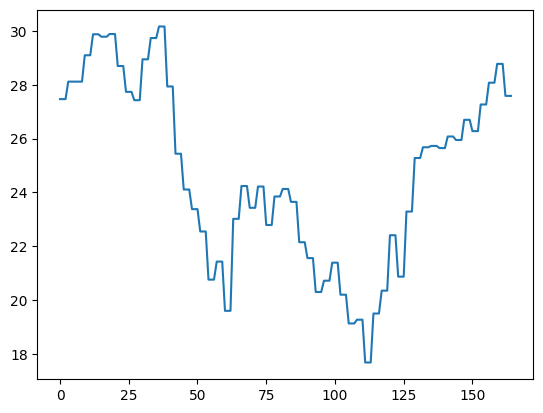

In [7]:
tariffs['Date'] = pd.to_datetime(tariffs['Date'],format='%Y%b')
tariffs['low_tension_domestic'].plot()

In [8]:
#now to look at oil prices (using the crude oil index DCOILWTICO)
oil_prices = pd.read_csv('./datasets/DCOILWTICO.csv')

In [9]:
#rename for more easily understood name
oil_prices.rename(columns={'observation_date':'Date','DCOILWTICO':'oil_price_usd_barrel'},inplace=True)

In [10]:
#chagne to datetime and set as index for timeseries
oil_prices['Date']=pd.to_datetime(oil_prices['Date'])
oil_prices.set_index('Date', inplace=True)

# Resample to monthly frequency and take the average
oil_prices_monthly = oil_prices.resample('MS').mean()

In [11]:
oil_prices_monthly = oil_prices_monthly.reset_index()

In [ ]:
#now to prep the lng index with same step
lng_prices = pd.read_csv('./datasets/PNGASJPUSDM.csv')

In [13]:
lng_prices.rename(columns={'observation_date':'Date','PNGASJPUSDM':'lng_price_usd_MMBtu'},inplace=True)

In [14]:
lng_prices['Date']=pd.to_datetime(lng_prices['Date'])

In [15]:
lng_prices.set_index('Date', inplace=True)

# Resample to monthly frequency and take the average and reset index to get date column for merging
lng_prices_monthly = lng_prices.resample('MS').mean()
lng_prices_monthly = lng_prices_monthly.reset_index()

In [ ]:
#now merge the 3 dfs together
merged = pd.merge(left = tariffs, right = oil_prices_monthly,how = 'left', on='Date')
merged.head()

,Date,low_tension_domestic,oil_price_usd_barrel
0,2025-09-01,27.47,NaN
1,2025-08-01,27.47,NaN
2,2025-07-01,27.47,68.594444
3,2025-06-01,28.12,68.169000
4,2025-05-01,28.12,62.167619


In [17]:
merged=pd.merge(left = merged, right = lng_prices_monthly,how = 'left', on='Date')
merged.head()

,Date,low_tension_domestic,oil_price_usd_barrel,lng_price_usd_MMBtu
0,2025-09-01,27.47,NaN,NaN
1,2025-08-01,27.47,NaN,NaN
2,2025-07-01,27.47,68.594444,NaN
3,2025-06-01,28.12,68.169000,12.963
4,2025-05-01,28.12,62.167619,11.678


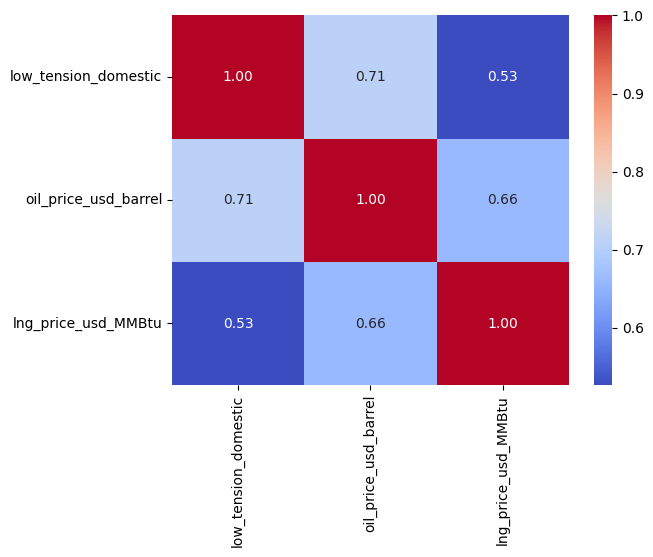

In [18]:
#plot corr heatmap to see the correlation
sns.heatmap(merged.drop(columns=['Date']).corr(), fmt='.2f', cmap='coolwarm', annot=True)
plt.show()

## Pretty strong correlation!

In [19]:
#now to drop the rows with null values and export
merged = merged.dropna()
merged = merged.set_index('Date')
merged

,low_tension_domestic,oil_price_usd_barrel,lng_price_usd_MMBtu
Date,,,
2025-06-01,28.12,68.169000,12.963
2025-05-01,28.12,62.167619,11.678
2025-04-01,28.12,63.536667,11.569
2025-03-01,28.12,68.239048,13.118
2025-02-01,28.12,71.533158,14.721
...,...,...,...
2012-05-01,28.78,94.654545,18.330
2012-04-01,28.78,103.321000,19.570
2012-03-01,27.59,106.157727,18.420


In [22]:
merged.to_csv('tariff_oilgas_prices.csv')